### Importing packages and Data 

In [46]:
# check this tuto : https://www.datacamp.com/tutorial/time-series-analysis-tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
UsageError: Line magic function `%` not found.


In [4]:
df =pd.read_csv(r"C:\Users\Asus\Desktop\Portfolio Projects\Python Projects\multiTimeline.csv", skiprows=1)
df.head()

,Mois,diet: (Dans tous les pays),gym: (Dans tous les pays),finance: (Dans tous les pays)
0,2004-01,100,27,46
1,2004-02,73,24,47
2,2004-03,67,23,47
3,2004-04,64,22,44
4,2004-05,72,19,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Mois                           230 non-null    object
 1   diet: (Dans tous les pays)     230 non-null    int64 
 2   gym: (Dans tous les pays)      230 non-null    int64 
 3   finance: (Dans tous les pays)  230 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.3+ KB


### Wrangle Your Data

In [7]:
df.columns= ["Month", "Diet", "Gym","Finance"]

In [8]:
df.head()

,Month,Diet,Gym,Finance
0,2004-01,100,27,46
1,2004-02,73,24,47
2,2004-03,67,23,47
3,2004-04,64,22,44
4,2004-05,72,19,40


In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 2004-01-01 to 2023-02-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Diet     230 non-null    int64
 1   Gym      230 non-null    int64
 2   Finance  230 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [27]:
df=df.set_index('Month', inplace=True)

KeyError: "None of ['Month'] are in the columns"

In [28]:
df

,Diet,Gym,Finance
Month,,,
2004-01-01,100,27,46
2004-02-01,73,24,47
2004-03-01,67,23,47
2004-04-01,64,22,44
2004-05-01,72,19,40
...,...,...,...
2022-10-01,28,48,52
2022-11-01,27,50,54
2022-12-01,26,47,50


### Exploratory data Analysis

<AxesSubplot:xlabel='Month'>

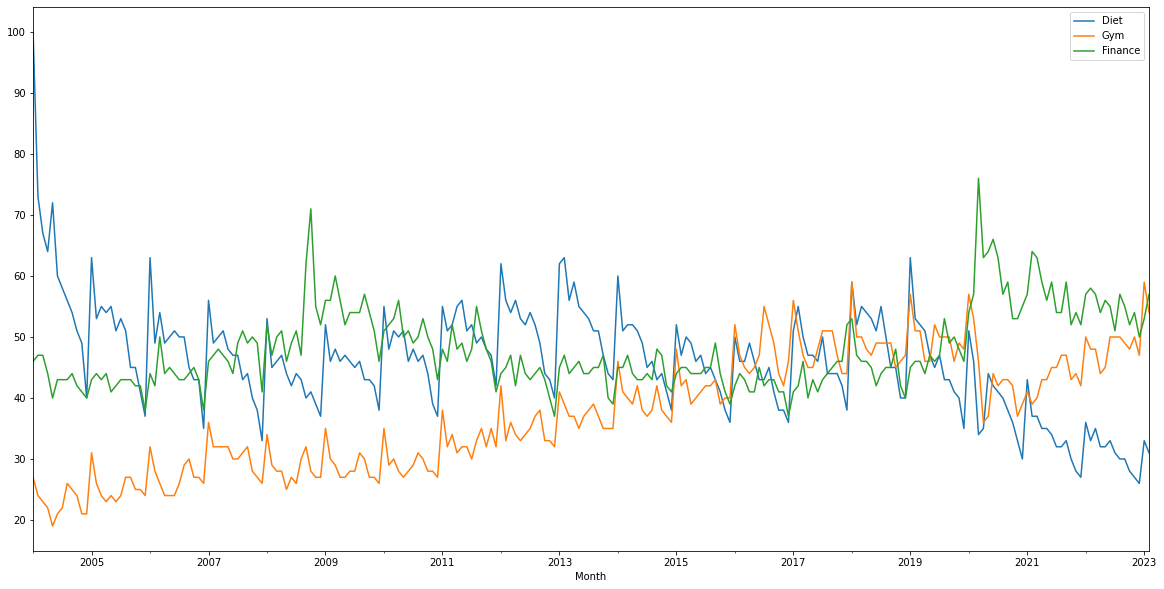

In [30]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Month'>

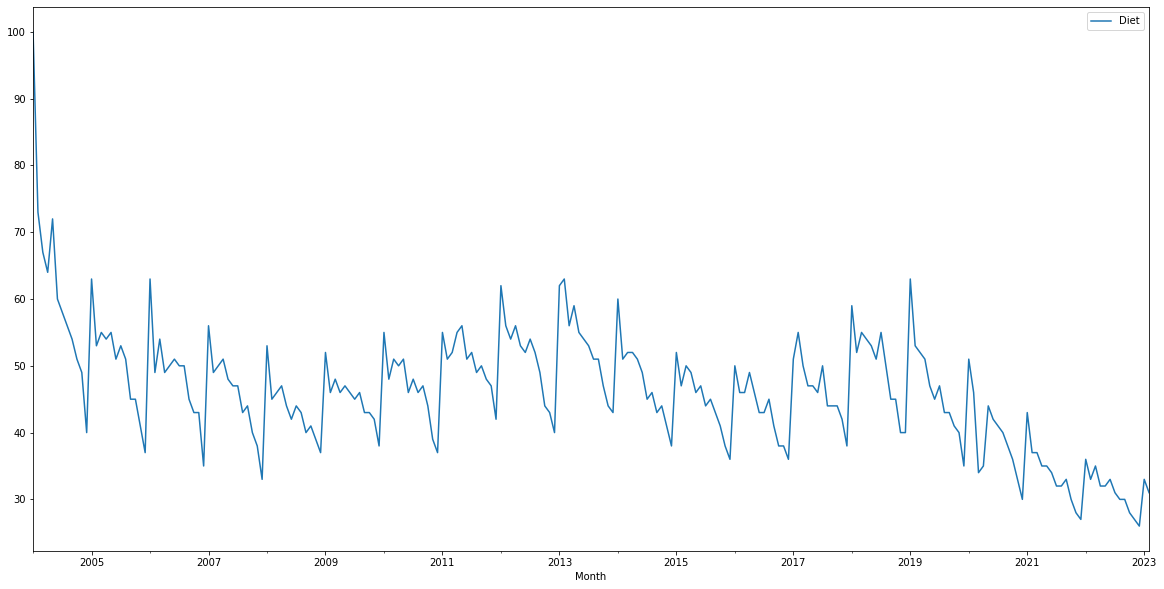

In [37]:
df[["Diet"]].plot(figsize=(20,10))

### Trends and seasonality in Time series data

#### identifying Trends in Time Series

There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that for each time point you take the average of the points on either side of it. Note that the number of points is specified by a window size which you need to choose. We need to remove the seasonality to identify the trends in the data

to transform the seasonality to trends by smoothing it to define the trends, to define when the loswet level and the highest level of searching for the identified word is taking place 


<AxesSubplot:xlabel='Month'>

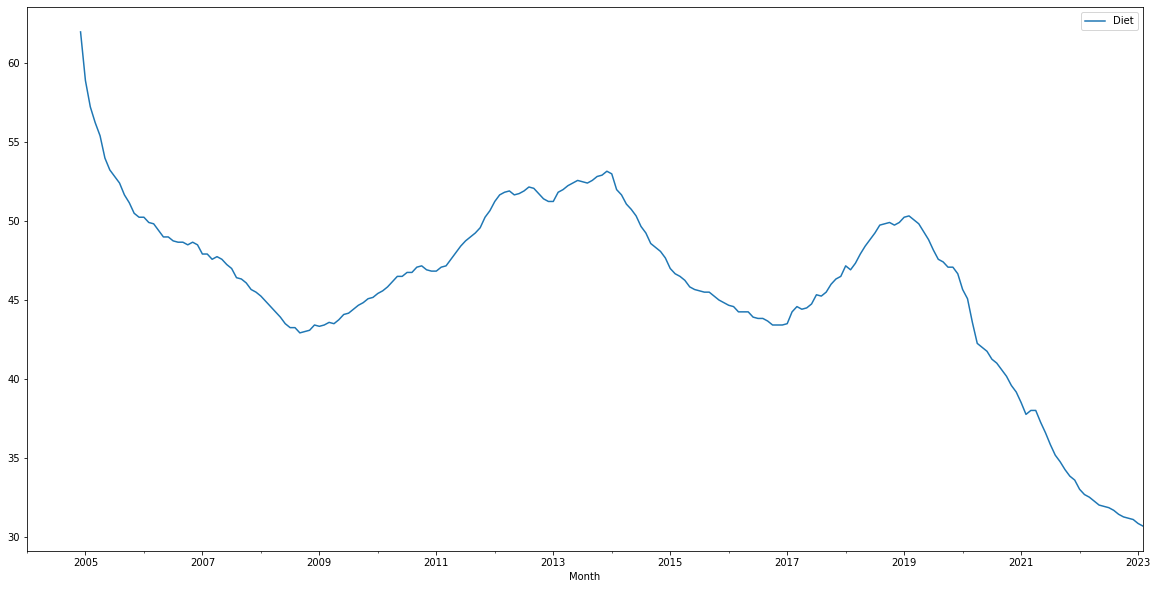

In [42]:
df[['Diet']].rolling(12).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Month'>

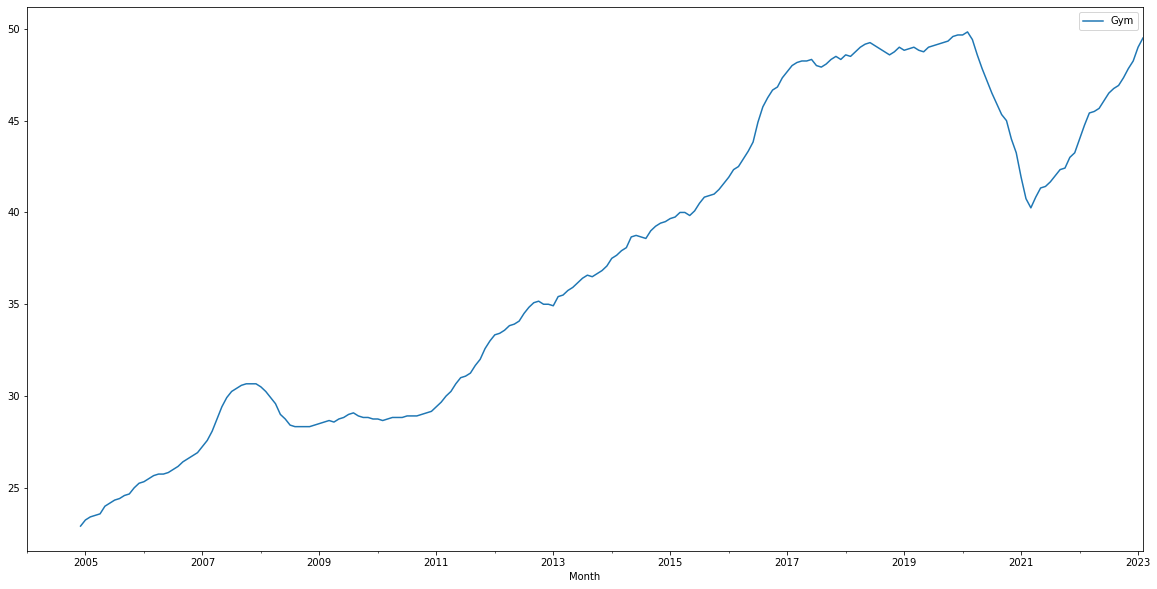

In [43]:
df[['Gym']].rolling(12).mean().plot(figsize=(20,10))

In [44]:
pd.concat([df[['Diet']].rolling(12).mean(), df[['Gym']].rolling(12).mean()], axis=1)

,Diet,Gym
Month,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
...,...,...
2022-10-01,31.250000,47.333333
2022-11-01,31.166667,47.833333
2022-12-01,31.083333,48.250000


<AxesSubplot:xlabel='Month'>

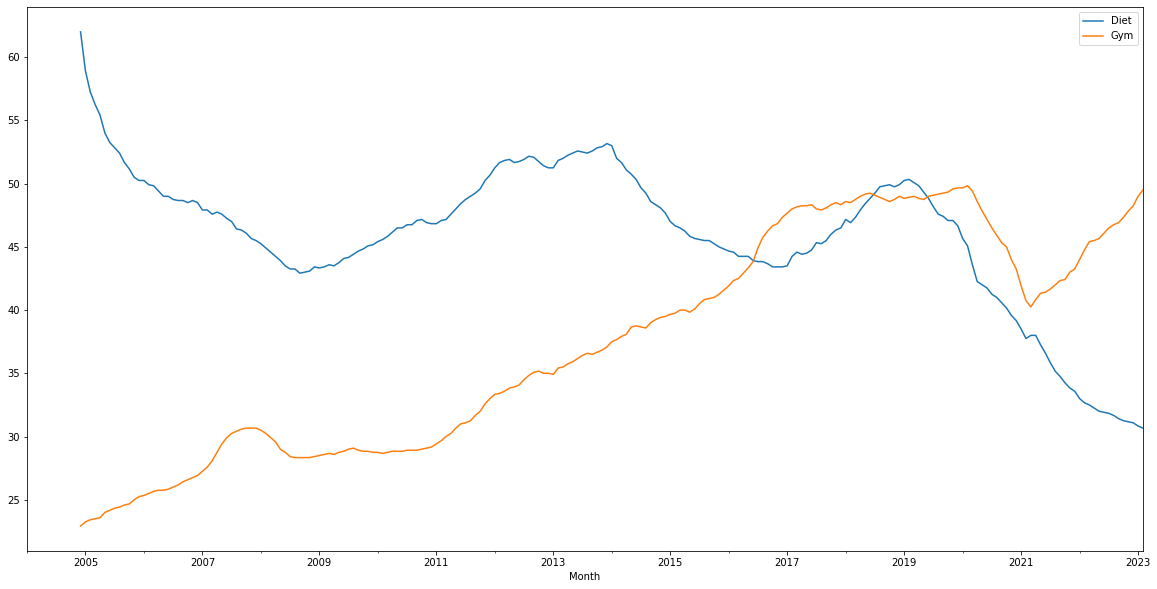

In [45]:
pd.concat([df[['Diet']].rolling(12).mean(), df[['Gym']].rolling(12).mean()], axis=1).plot(figsize=(20,10))

In [52]:
df_sorted = df.sort_values('Diet')
df_sorted

,Diet,Gym,Finance
Month,,,
2022-12-01,26,47,50
2022-11-01,27,50,54
2021-12-01,27,42,52
2021-11-01,28,44,54
2022-10-01,28,48,52
...,...,...,...
2004-04-01,64,22,44
2004-03-01,67,23,47
2004-05-01,72,19,40
